## DWI Image Classification Model

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt # type: ignore

In [2]:
# #import packages
# import os
# import cv2
# import datetime
# import itertools
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# import matplotlib.pyplot as plt
# from tqdm import tqdm
# from enum import Enum
# from random import sample
# from tensorflow import keras
# from patchify import patchify
# from keras_unet_collection import models
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# # from sklearn.metrics import plot_confusion_matrix
# from sklearn.metrics import ConfusionMatrixDisplay
# from tensorflow.keras.utils import to_categorical
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.applications import DenseNet121
# # from tensorflow.keras.layers.experimental.preprocessing import Rescaling
# from tensorflow.keras.layers import Rescaling
# from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
# from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
# from tensorflow.keras.layers import Dense,Flatten,Dropout,Input, Conv2D, MaxPooling2D, concatenate, Conv2DTranspose

# import mlflow
# import mlflow.keras
# import os
# from tensorflow.keras.callbacks import Callback

In [4]:
#directory Skin Cancer
old_Directory = './PAD-UFES-20 (images collected from smartphones)/images'
Directory = './New_PAD-UFES-20/'
Target = './Target_PAD-UFES-20/'
Checkpoint = './Checkpoint/'
Threshold = './Threshold-img/'

#create directory folder
if not os.path.exists(Directory):
    os.makedirs(Directory)
if not os.path.exists(Target):
    os.makedirs(Target)
if not os.path.exists(Checkpoint):
    os.makedirs(Checkpoint)
if not os.path.exists(Threshold):
    os.makedirs(Threshold)


In [6]:
def count_values_in_column(data,feature):
     total=data.loc[:,feature].value_counts(dropna=False)
     percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
     return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [7]:
def pichart(metadata,column,title):
    pichart = count_values_in_column(metadata,column)
    names= pichart.index
    size=pichart["Percentage"]

    colors = ['#70d6ff','#99ff99','#ff70a6','#ff9770','#ffd670','#e9ff70']
    
    # only "explode" the 2nd slice (i.e. 'Hogs')
    explode_n = len(size)
    if explode_n == 2 :
        explode = (0.1,0.1)
    elif explode_n == 3 :
        explode = (0.1,0.1,0.1)
    elif explode_n == 4 :
        explode = (0.1,0.1,0.1,0.1)
    elif explode_n == 5 :
        explode = (0.1,0.1,0.1,0.1,0.1)
    elif explode_n == 6 :
        explode = (0.1,0.1,0.1,0.1,0.1,0.1)
        
    plt.pie(size,explode=explode , labels=names, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=90)

    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.axis('equal')
    plt.tight_layout()
    plt.title(title,loc="left",backgroundcolor='green')
    plt.show()

In [8]:
Data_SkinCancer = pd.read_csv(".\Data_SkinCancer.csv")

In [9]:
Data_SkinCancer

,img_name,img_id,diagnostic,type,U-Net_type
0,PAT_1516_1765_530,PAT_1516_1765_530.png,NEV,Skin Diseases,Skin Diseases
1,PAT_46_881_939,PAT_46_881_939.png,BCC,Skin Cancers,BCC
2,PAT_1545_1867_547,PAT_1545_1867_547.png,ACK,Skin Diseases,Skin Diseases
3,PAT_1989_4061_934,PAT_1989_4061_934.png,ACK,Skin Diseases,Skin Diseases
4,PAT_684_1302_588,PAT_684_1302_588.png,BCC,Skin Cancers,BCC
...,...,...,...,...,...
2293,PAT_1708_3156_175,PAT_1708_3156_175.png,ACK,Skin Diseases,Skin Diseases
2294,PAT_46_880_140,PAT_46_880_140.png,BCC,Skin Cancers,BCC
2295,PAT_1343_1217_404,PAT_1343_1217_404.png,SEK,Skin Diseases,Skin Diseases
2296,PAT_326_690_823,PAT_326_690_823.png,BCC,Skin Cancers,BCC


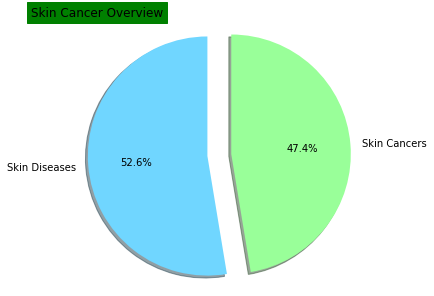

In [10]:
pichart(Data_SkinCancer,"type","Skin Cancer Overview")

In [11]:
# Split Data (Skin Diseases = 1000 , Skin Cancers = 1000) Other to Test Data 178 images
skin_cancer_Train = pd.DataFrame()
skin_cancer_Test = pd.DataFrame()

Skin_Diseases = 0
Skin_Cancers = 0
for index, row in tqdm(Data_SkinCancer.iterrows()):
    temporary =  pd.DataFrame({'img_id':row['img_id'], 'diagnostic':row['diagnostic'], 'type':row['type']}, index=[0])
    if row['type'] == "Skin Diseases" and Skin_Diseases < 1000 :
        skin_cancer_Train = pd.concat([skin_cancer_Train, temporary],ignore_index=True)
        Skin_Diseases = Skin_Diseases + 1
    elif row['type'] == "Skin Cancers" and Skin_Cancers < 1000 :
        skin_cancer_Train = pd.concat([skin_cancer_Train, temporary],ignore_index=True)
        Skin_Cancers = Skin_Cancers + 1
    else :
        if row['type'] == "Skin Diseases" and Skin_Diseases < 1089 :
            skin_cancer_Test = pd.concat([skin_cancer_Test, temporary],ignore_index=True)
            Skin_Diseases = Skin_Diseases + 1
        elif row['type'] == "Skin Cancers" and Skin_Cancers < 1089 :
            skin_cancer_Test = pd.concat([skin_cancer_Test, temporary],ignore_index=True)
            Skin_Cancers = Skin_Cancers + 1

skin_cancer = pd.concat([skin_cancer_Train, skin_cancer_Test], ignore_index=True)

2298it [00:01, 2233.89it/s]


In [12]:
skin_cancer_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   img_id      178 non-null    object
 1   diagnostic  178 non-null    object
 2   type        178 non-null    object
dtypes: object(3)
memory usage: 4.3+ KB


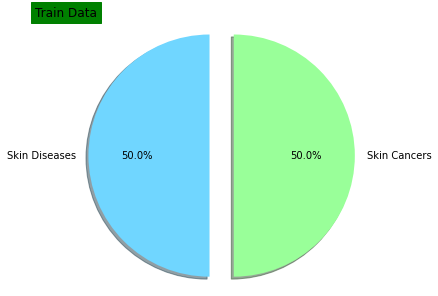

In [13]:
pichart(skin_cancer_Train,"type","Train Data")

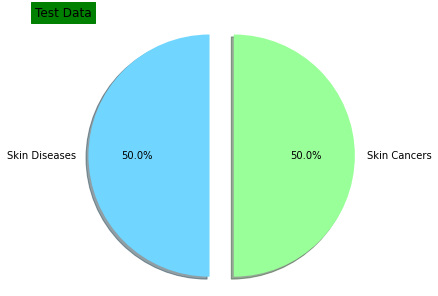

In [14]:
pichart(skin_cancer_Test,"type","Test Data")

In [15]:
# Dullrazor algorithm: https://github.com/sunnyshah2894/DigitalHairRemoval
def dullrazor(img):
     # -*- coding: utf-8 -*-
     """
     Following are the DHR tasks followed in this example code:
     
     -- Applying Morphological Black-Hat transformation
     -- Creating the mask for InPainting task
     -- Applying inpainting algorithm on the image
     """

     src = cv2.imread(img)

     # Convert the original image to grayscale
     grayScale = cv2.cvtColor( src, cv2.COLOR_RGB2GRAY )

     # Kernel for the morphological filtering
     kernel = cv2.getStructuringElement(1,(17,17))

     # Perform the blackHat filtering on the grayscale image to find the 
     # hair countours
     blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)

     # intensify the hair countours in preparation for the inpainting 
     # algorithm
     ret,thresh2 = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)

     # inpaint the original image depending on the mask
     dst = cv2.inpaint(src,thresh2,1,cv2.INPAINT_TELEA)
    
     return dst

In [16]:
# combine images to folder (first time)
if len(os.listdir(Directory)) < 2298:
    for i in os.listdir(old_Directory):
        img_ID = os.listdir(old_Directory + '/' + i)
        all_img = list(map(lambda x: old_Directory + '/' + i + '/' + x , img_ID))
        for j in tqdm(all_img):
            ID = os.path.split(j)
            Dullrazor = dullrazor(j) # Dullrazor algorithm
            cv2.imwrite(str(Directory + ID[1]),Dullrazor)

In [17]:
# Thresholding 
if len(os.listdir(Directory)) < 2298:
    for index, row in tqdm(Data_SkinCancer.iterrows()):
        image = cv2.imread(Directory+row['img_id'], cv2.IMREAD_COLOR)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        canny_settings = [50, 100]
        edged = cv2.Canny(img, canny_settings[0], canny_settings[1])
        ret, thresh1 = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV)
        contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        width,height = 224,224
        #finding contours
        h, w = img.shape[:2]

        idx = 0
        for c in contours:
            x, y, w, h = cv2.boundingRect(c)
            if w > 50 and h > 50:
                idx += 1
                new_img = image[y:y + h, x:x + w]
                #cropping images
                dim = (width, height)
                resized = cv2.resize(new_img, dim, interpolation=cv2.INTER_AREA)
        cv2.imwrite(Threshold+row['img_id'], resized)
        

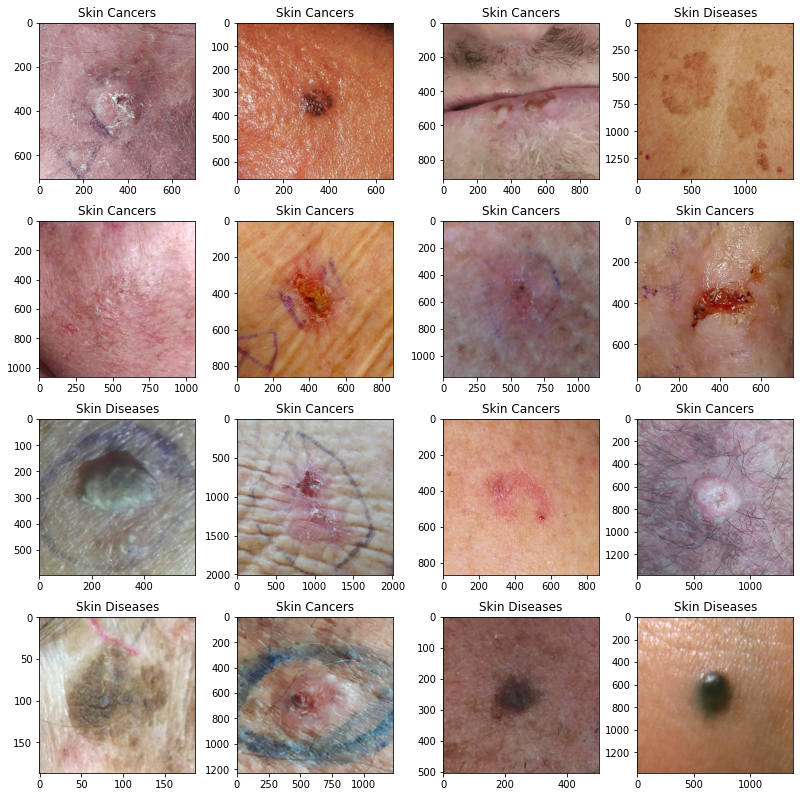

In [18]:
files_path_ex = skin_cancer_Train.sample(n=16).reset_index(drop=True)

#visualize
plt.figure(figsize = (11,11),constrained_layout=True)
for index, row in files_path_ex.iterrows():
    plt.subplot(4, 4, index+1)
    plt.imshow(load_img(Directory+row['img_id']))
    plt.title(row['type'])

In [19]:
# Splitting training(1600) and validating(400) data
train_df, validate_df = train_test_split(skin_cancer_Train, test_size=0.2, random_state=42)

#  reset the old index 
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [20]:
# Set a datagenerator
# Data generator apply different effect to the training images
train_datagen = ImageDataGenerator(rotation_range=20,       #หมุนภาพ (Rotate) ไม่เกินองศา แบบสุ่ม
                                    rescale=1./255,         #ปรับขนาดภาพให้เป็นระดับสีของภาพเท่ากับ 255
                                    shear_range=0.1,        #บิดภาพ (Shear) แบบสุ่ม
                                    zoom_range=0.1,         #ขยายภาพ (Zoom) แบบสุ่ม
                                    horizontal_flip=True,   #กลับภาพแนวนอน (Horizontal Flip) แบบสุ่ม
                                    vertical_flip=True,     #กลับภาพแนวตั้ง (Vertical Flip) แบบสุ่ม
                                    width_shift_range=0.1,  #การเลื่อนภาพซ้ายขวาแบบสุ่ม
                                    height_shift_range=0.1) #การเลื่อนภาพขึ้นลงแบบสุ่ม

# Generate data for training and validation
train_generator = train_datagen.flow_from_dataframe(train_df, 
                                                    Directory, 
                                                    x_col='img_id', 
                                                    y_col='type',
                                                    target_size=(224,224),
                                                    class_mode='categorical',
                                                    batch_size=16)
validate_generator = train_datagen.flow_from_dataframe(validate_df,
                                                       Directory,
                                                       x_col='img_id',
                                                       y_col='type',
                                                       target_size=(224,224),
                                                       class_mode='categorical',
                                                       batch_size=16)
#test set
test_generator = ImageDataGenerator()
test_generator = test_generator.flow_from_dataframe(skin_cancer_Test,
                                             Directory,
                                             x_col='img_id',
                                             y_col='type',
                                             target_size=(224, 224),
                                             class_mode='categorical',
                                             shuffle=True)
#================
# Uncomment this block if want to see a sample of data generator
example = train_df.sample(n=1).reset_index(drop=True)
example_gen = train_datagen.flow_from_dataframe(example,
                                                Directory,
                                                x_col = 'img_id',
                                                y_col = 'type',
                                                target_size=(224,224),
                                                class_mode='categorical')

Found 1600 validated image filenames belonging to 2 classes.
Found 400 validated image filenames belonging to 2 classes.
Found 178 validated image filenames belonging to 2 classes.
Found 1 validated image filenames belonging to 1 classes.


In [21]:
classes = list(iter(train_generator.class_indices))
class_indices = train_generator.class_indices
print(class_indices)

{'Skin Cancers': 0, 'Skin Diseases': 1}


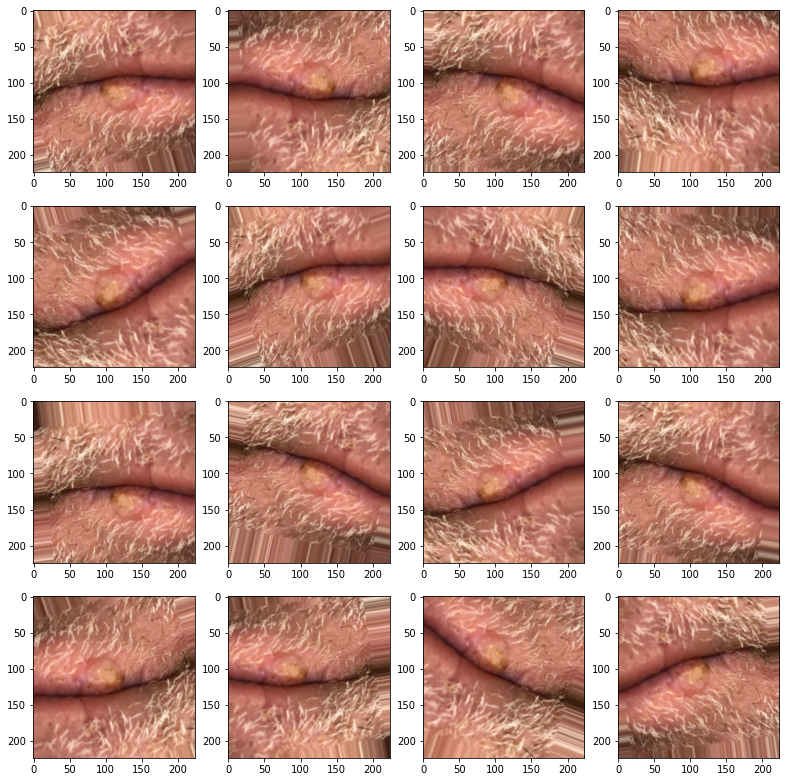

In [22]:
plt.figure(figsize=(11,11))
for i in range(0, 16):
    plt.subplot(4,4,i+1)
    for X, Y in example_gen:
        image = X[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

## Transfer Learning & Fine-Tuning

In [23]:
# Create a model, and removing the last layer that is classifying 1000 images. This will be replaced with images classes we have. 
#Training with Imagenet weights
base_model = DenseNet121(input_shape=(224,224,3),
                    weights= 'imagenet',
                    include_top=False,
                    pooling='max',
                    )
# freeze layer
base_model.trainable = False

layer = Flatten()(base_model.output)
layer = Dropout(0.2)(layer)
prediction = Dense(len(classes), activation='softmax')(layer)

#Creating model object 
model = Model(inputs=base_model.input, outputs=prediction)

# Fine-tune from this layer onwards
len_layers = len(model.layers)
freeze = len_layers*0.20

# This sets the base that the layers are not trainable. If we'd want to train the layers with custom data, these two lines can be ommitted. 
for layer in model.layers[int(freeze):]:
  layer.trainable = True

In [24]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ",len(model.layers))

Number of layers in the base model:  431


In [25]:
model.summary()
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [26]:
# datetime for filename saving
dt_now = str(datetime.datetime.now()).replace(".", "_").replace(":", "_")
filepath = Checkpoint + '/DenseNet121-weights-{epoch:02d}-{val_accuracy:.2f}.hdf5'

#define checkpoint
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode="max",
                             verbose=1)

#early stopping
earlystop = EarlyStopping(monitor='val_loss',
                          patience=3,
                          mode='auto',
                          verbose=1)

#reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor = 'accuracy', 
                              factor = 0.3, 
                              patience = 2, 
                              min_delta = 0.001,
                              mode='auto',
                              verbose=1)

In [27]:
#Step 3: Initialize Tensorboard to monitor changes in Model Loss 
import datetime
# %load_ext tensorboard
log_dir = "logs/fit/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [28]:
#Visualize on tensorboard (move this above)
# %tensorboard --logdir logs/fit

In [31]:
# mlflow configuration
mlflow.set_tracking_uri("http://localhost:5000")


experiment_name = "CNN-SkinCancer-Model"
mlflow.set_experiment(experiment_name)


mlflow.enable_system_metrics_logging()
mlflow.tensorflow.autolog()

# Define a custom callback to log metrics for each epoch
class MLflowLoggingCallback(Callback):
    def on_epoch_end(self, epochs, logs=None):
        if logs is not None:
            mlflow.log_metric('accuracy', logs.get('accuracy'), step=epochs)
            mlflow.log_metric('loss', logs.get('loss'), step=epochs)
            mlflow.log_metric('val_accuracy', logs.get('val_accuracy'), step=epochs)
            mlflow.log_metric('val_loss', logs.get('val_loss'), step=epochs)


with mlflow.start_run():
    n_epochs = 100
    
    # Add a description for the run
    mlflow.set_tag("mlflow.note.content", "For testing ML Flow")
    mlflow.autolog()

    #train model
    history = model.fit(train_generator,
                        epochs = n_epochs,
                        validation_data=validate_generator,
                        callbacks=[checkpoint,reduce_lr,tensorboard_callback,MLflowLoggingCallback()]
                        )
    
    mlflow.keras.log_model(model, "model")

2024/06/25 14:18:27 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
2024/06/25 14:18:27 INFO mlflow.system_metrics.system_metrics_monitor: Started monitoring system metrics.
2024/06/25 14:18:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/06/25 14:18:28 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.preprocessing.image.DataFrameIterator'>. Dataset logging skipped.
2024/06/25 14:18:28 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.preprocessing.image.DataFrameIterator'>. Dataset logging skipped.


Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 0.5186 - accuracy: 0.8556
Epoch 00001: val_accuracy improved from 0.79500 to 0.82750, saving model to ./Checkpoint\DenseNet121-weights-01-0.83.hdf5
100/100 [==============================] - 60s 603ms/step - loss: 0.5186 - accuracy: 0.8556 - val_loss: 0.7575 - val_accuracy: 0.8275 - lr: 1.0000e-04
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 0.5726 - accuracy: 0.8569
Epoch 00002: val_accuracy did not improve from 0.82750
100/100 [==============================] - 59s 586ms/step - loss: 0.5726 - accuracy: 0.8569 - val_loss: 0.6768 - val_accuracy: 0.8075 - lr: 1.0000e-04
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 0.4710 - accuracy: 0.8769
Epoch 00003: val_accuracy improved from 0.82750 to 0.83500, saving model to ./Checkpoint\DenseNet121-weights-03-0.83.hdf5
100/100 [==============================] - 59s 592ms/step - loss: 0.4710 - accuracy: 0.8769 - val_loss: 0.81

2024/06/25 16:03:17 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: '>=' not supported between instances of 'slice' and 'int'
2024/06/25 16:03:17 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\smooth\AppData\Local\Temp\tmpg4sgpy5c\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\smooth\AppData\Local\Temp\tmpg4sgpy5c\model\data\model\assets
2024/06/25 16:04:20 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\smooth\.conda\envs\srib-skincancer\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils."


In [ ]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(25,8)

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

ax[0].plot(epochs , train_acc , 'g-o' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'y-o' , label = 'Validation Accuracy')
ax[0].set_title('Model Training & Validation Accuracy')
ax[0].legend(loc = 'lower right')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'y-o' , label = 'Validation Loss')
ax[1].set_title('Model Training & Validation & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

## Evaluation and prediction

In [ ]:
val_loss, val_accuracy = model.evaluate(validate_generator)
print("Validate accuracy: {:.2f}%".format(val_accuracy * 100))
print("Validate loss: {:.2f}%".format(val_loss * 100))

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test accuracy: {:.2f}%".format(test_accuracy * 100))
print("Test loss: {:.2f}%".format(test_loss * 100))

In [ ]:
# define labels for testing
labels = test_generator.classes
labels =[list(class_indices.keys())[list(class_indices.values()).index(x)] for x in labels]
# make prediction
prediction_test = np.argmax(model.predict(test_generator), axis=1)
prediction_test =[list(class_indices.keys())[list(class_indices.values()).index(x)] for x in prediction_test]

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = "viridis"):
    
    plt.figure(figsize = (7,7))
    im_ = plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    plt.grid(False)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = (cm.max() + cm.min()) / 2.0
    cmap_min, cmap_max = im_.cmap(0), im_.cmap(1.0)
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 fontsize = 12,
                 horizontalalignment = "center",
                 color = cmap_max if cm[i, j] < thresh else cmap_min)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

#get confusion matrix
cm = confusion_matrix(labels, prediction_test)

#plot
plot_confusion_matrix(cm, classes, normalize=False)

In [ ]:
#get classification report
print(classification_report(labels, prediction_test))

In [ ]:
prediction = []
original = []
image = []
expand_dims = []
for index, row in tqdm(skin_cancer_Test.iterrows()): 
  #open the image
  img= load_img(Directory+row['img_id'],target_size=(224,224))
  #append to image list
  image.append(img)
  #expand dimension
  img = np.expand_dims(img, axis=0)
  expand_dims.append(img)
  #predict & get the index corresponding to the highest value in the prediction
  predict =  np.argmax(model.predict(img))
  #append the predicted class to the list
  prediction.append(list(class_indices.keys())[list(class_indices.values()).index(predict)])
  #append original class to the list
  original.append(row['type'])
  

##  Visualize GradCAM

In [ ]:
#used the VizGradCam code from gkeechin.py VizGradCam is the fastest way to visualize GradCAM in Keras models.
#https://github.com/gkeechin/vizgradcam/blob/main/gradcam.py

import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as plt
from skimage.transform import resize
from tensorflow.keras.models import Model

def VizGradCAM(model, image, interpolant=0.7, plot_results=True):
    """VizGradCAM - Displays GradCAM based on Keras / TensorFlow models
    using the gradients from the last convolutional layer. This function
    should work with all Keras Application listed here:
    https://keras.io/api/applications/
    Parameters:
    model (keras.model): Compiled Model with Weights Loaded
    image: Image to Perform Inference On
    plot_results (boolean): True - Function Plots using PLT
                            False - Returns Heatmap Array
    Returns:
    Heatmap Array?
    """
    # Sanity Check
    assert (
        interpolant > 0 and interpolant < 1
    ), "Heatmap Interpolation Must Be Between 0 - 1"

    last_conv_layer = next(
        x for x in model.layers[::-1] if isinstance(x, K.layers.Conv2D)
    )
    target_layer = model.get_layer(last_conv_layer.name)

    original_img = image
    img = np.expand_dims(original_img, axis=0)
    prediction = model.predict(img)

    # Obtain Prediction Index
    prediction_idx = np.argmax(prediction)

    # Compute Gradient of Top Predicted Class
    with tf.GradientTape() as tape:
        gradient_model = Model([model.inputs], [target_layer.output, model.output])
        conv2d_out, prediction = gradient_model(img)
        # Obtain the Prediction Loss
        loss = prediction[:, prediction_idx]

    # Gradient() computes the gradient using operations recorded
    # in context of this tape
    gradients = tape.gradient(loss, conv2d_out)

    # Obtain the Output from Shape [1 x H x W x CHANNEL] -> [H x W x CHANNEL]
    output = conv2d_out[0]

    # Obtain Depthwise Mean
    weights = tf.reduce_mean(gradients[0], axis=(0, 1))

    # Create a 7x7 Map for Aggregation
    activation_map = np.zeros(output.shape[0:2], dtype=np.float32)

    # Multiply Weights with Every Layer
    for idx, weight in enumerate(weights):
        activation_map += weight * output[:, :, idx]

    # Resize to Size of Image
    activation_map = cv2.resize(
        activation_map.numpy(), (original_img.shape[1], original_img.shape[0])
    )

    # Ensure No Negative Numbers
    activation_map = np.maximum(activation_map, 0)

    # Convert Class Activation Map to 0 - 255
    activation_map = (activation_map - activation_map.min()) / (
        activation_map.max() - activation_map.min()
    )
    activation_map = np.uint8(255 * activation_map)

    # Convert to Heatmap
    heatmap = cv2.applyColorMap(activation_map, cv2.COLORMAP_JET)

    # Superimpose Heatmap on Image Data
    original_img = np.uint8(
        (original_img - original_img.min())
        / (original_img.max() - original_img.min())
        * 255
    )

    cvt_heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Enlarge Plot
    plt.rcParams["figure.dpi"] = 100

    if plot_results == True:
        plt.imshow(
            np.uint8(original_img * interpolant + cvt_heatmap * (1 - interpolant))
        )
    else:
        return cvt_heatmap

In [ ]:
# Predict Class
def Classify(image_array,show=True):
    img = np.expand_dims(image_array, axis=0)
    img = np.vstack([img])
    pred = model.predict(img)
    score = tf.nn.softmax(pred[0])
    if show == True:
        print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(classes[np.argmax(score)], 100 * np.max(score)))
        
    pred_class = classes[np.argmax(pred)]
    
    return pred_class

In [ ]:
#load image
test_img = load_img("./New_PAD-UFES-20/PAT_633_1199_218.png", target_size=(224, 224))
print('Dimensions : ',test_img)

fig , ax = plt.subplots(1,3)
fig.set_size_inches(13,13)

ax[0].set_title('Original Image')
ax[0].imshow(test_img)
ax[1].set_title('Heatmap')
ax[1].imshow(VizGradCAM(model, img_to_array(test_img), plot_results=False))
ax[2].set_title('VizGradCAM')
ax[2] = VizGradCAM(model, img_to_array(test_img), plot_results=True)

In [ ]:
files_path_test = skin_cancer_Test.sample(n=3).reset_index(drop=True)

#visualize
for index, row in tqdm(files_path_test.iterrows()):
    img = load_img(Directory+row['img_id'],target_size=(224, 224))
    fig , ax = plt.subplots(1,3)
    fig.set_size_inches(10,10)
    ax[0].set_title('Original Image: '+row['type'])
    ax[0].imshow(img)
    ax[1].set_title('Heatmap')
    ax[1].imshow(VizGradCAM(model, img_to_array(img), plot_results=False))
    ax[2].set_title('VizGradCAM: '+ Classify(img,show=False))
    ax[2] = VizGradCAM(model, img_to_array(img), plot_results=True)

In [ ]:
files_path_test = skin_cancer_Test.sample(n=8).reset_index(drop=True)

#visualize
plt.figure(figsize = (10,10),constrained_layout=True)
i = 1
for index, row in tqdm(files_path_test.iterrows()):
    plt.subplot(4, 4, i)
    plt.imshow(load_img(Directory+row['img_id'],target_size=(224, 224)))
    plt.title(row['type'])
    i += 1
    plt.subplot(4, 4, i)
    img_ar = img_to_array(load_img(Directory+row['img_id'],target_size=(224, 224)))
    VizGradCAM(model, img_ar, plot_results=True)
    plt.title(Classify(img_ar,show=False))
    i += 1